# Proyecto Final ML

Asignatura: Autoaprendizaje de maquina y analisis de datos.
Integrantes:
1.   Willian Chapid Tobar / will1an@javerianacali.edu.co
2.   Daniel Andres Vasquez / danielvasquez2004@javerianacali.edu.co
3.   Miguel Angel Nivia Ortega / miguelnivia19@javerianacali.edu.co

#### Bases de datos:

* Body performance Data (Clasificacion) - https://www.kaggle.com/datasets/kukuroo3/body-performance-data
* Near Earth Objects 1900 to 2200 (Regresion) - https://www.kaggle.com/datasets/pedroclapers/near-earth-objects-1900-to-2200

In [ ]:
# Librerias A Usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA, FastICA, KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## EDA - Body Performance Data (Etapa 1)

In [ ]:
# carga base de datos
uploaded = files.upload()
dataBody = pd.read_csv("bodyPerformance.csv")

Saving bodyPerformance.csv to bodyPerformance.csv


In [ ]:
# Verificacion de cantidad de filas y columnas que tiene el csv
print("\n", dataBody.shape, "\n")
# Verificacion de la info de la tabla csv
dataBody.info()
# Analisis de las primeras 5 muestras
print("\n", dataBody.head())


 (13393, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB

     age gender  height_cm  weight_kg  body fat_%  diastolic  sys

In [ ]:
# Analisis de datos
dataBody.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
print(dataBody.loc[dataBody["diastolic"].between(-1,0)])
print(dataBody.loc[10624])

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
10624  26.0      F      160.0      63.56        32.0        0.0       0.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
10624       23.7                     17.1            23.0          128.0     D  
age                         26.0
gender                         F
height_cm                  160.0
weight_kg                  63.56
body fat_%                  32.0
diastolic                    0.0
systolic                     0.0
gripForce                   23.7
sit and bend forward_cm     17.1
sit-ups counts              23.0
broad jump_cm              128.0
class                          D
Name: 10624, dtype: object


Nota: Las variables a analizar tienen un contexto para poder ser de utilidad y hacer un EDA fiable \ La base de datos recolectada es sobre atletas que realizaron pruebas fisicas para ser clasificados para diferentes competencias o deportes.
- age: Edad de las personas medida, no hay nada extrano en la base de datos
- Height_cm: Altura de las personas que se mide en cm, no hay nada extrano en la base de datos
- weight_kg: Peso de las personas que se mide en kg, no hay datos extranos ya que estamos hablando de personas de alto rendimiento deportivo.
- body fat_%: Porcentaje de grasa, este porcentaje tiene un dato erroneo ya que el maximo dice ser del 78% pero eso para un atleta y para la media que ronda el 17% es absurdo, es posible que haya un problema de digitacion
-diastolic y systolic: son presiones arteriales que se miden en milímetros de mercurio (mmHg), las cuales miden la contraccion y relajacion del corazon, entonces una medida minima de 0 es absurdo porque eso quiere decir que no hay presion sanguinea y eso no puede ocurrir a menos que la persona este muerta.
-GridForce: es la fuerza de agarre de las personas medida en kg, no puede existir una medida de 0 ya que estamos hablando de atletas sin discapacidades fisica notorias.
- sit and bend fordward _cm: El ejercicio de sentarse y estirarse hacia adelante pero tambien podria estirar hacia atras.
- sit_ups_count: el contador de abdominales se mide en la cantidad que la persona puede realizar durante un minuto, es posible que algunos atletas no puedan realizarlo, no hay nada extrano.
-broad_jump: El salta largo se mide en cm, no es posible que una persona no pueda saltar una distancia de 0 cm hacia adelante.

Despues de esta contextualizacion es evidente que algunos de los atletas no tomaron algunas pruebas y tambien puede haber problemas de digitacion a la hora de recolectar los datos, por lo tanto se debria completar con la media dependiendo si es hombre o mujer y corregir los datos erroneos.

In [ ]:
# Verificacion de datos/registros duplicados

duplicados = dataBody.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados = duplicados.any() # Se verifica si hay algun True de duplicados que inidica que si existe al menos 1 registro duplicado.

if existeDuplicados:
    print("El dataset tiene registros duplicados.")
    conteo = dataBody[duplicados].shape[0]
    print(f"Número de registros duplicados: {conteo}")  # Se devuelve el numero de registros duplicados
else:
    print("El dataset no tiene registros duplicados.")

El dataset tiene registros duplicados.
Número de registros duplicados: 1


Como se puede observar, se ve que hay un solo dato repetido en el dataset, el cual auqnue sea solo 1 puede afectr ligeramente los calculos del entrenamiento y demas, por lo cual se va a eliminar este elemento.

In [ ]:
# Eliminacion elemento repetido
dataBody2 = dataBody.drop_duplicates()

In [ ]:
#  Se verifica qu eahora si no halla datos/registros repetidos

duplicados = dataBody2.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados = duplicados.any() # Se verifica si hay algun True de duplicados que inidica que si existe al menos 1 registro duplicado.

if existeDuplicados:
    print("El dataset tiene registros duplicados.")
    conteo = dataBody2[duplicados].shape[0]
    print(f"Número de registros duplicados: {conteo}")  # Se devuelve el numero de registros duplicados
else:
    print("El dataset no tiene registros duplicados.")

El dataset no tiene registros duplicados.


In [ ]:
# Analisis de datos
dataBody2.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797499,130.238120,36.964569,15.208933,39.770385,190.131355
std,13.625886,8.426305,11.949061,7.256829,10.742165,14.709536,10.624959,8.456904,14.276902,39.868988
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
# Revision de tamaño modificado
dataBody2.shape

(13392, 12)

In [ ]:
# Verificacion de datos nulos

nulos = dataBody2.isnull().sum()
print(nulos)

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


Despues de un analisis rapido de la tabla con la funcion se observa que no existe valores nulos y cada seccion del contenido se encuentra completo, para evitar falta de datos.

In [ ]:
# Verificacion de cantidad de valores de 0 en cada caracteristica

print('No. of zero values in age is', dataBody2[dataBody2['age'] == 0].shape[0])
print('No. of zero values in height_cm is', dataBody2[dataBody2['height_cm'] == 0].shape[0])
print('No. of zero values in weight_kg is', dataBody2[dataBody2['weight_kg'] == 0].shape[0])
print('No. of zero values in body fat_% is', dataBody2[dataBody2['body fat_%'] == 0].shape[0])
print('No. of zero values in diastolic is', dataBody2[dataBody2['diastolic'] == 0].shape[0])
print('No. of zero values in systolic is', dataBody2[dataBody2['systolic'] == 0].shape[0])
print('No. of zero values in gripForce is', dataBody2[dataBody2['gripForce'] == 0].shape[0])
print('No. of zero values in sit and bend forward_cm is', dataBody2[dataBody2['sit and bend forward_cm'] == 0].shape[0])
print('No. of zero values in sit-ups counts is', dataBody2[dataBody2['sit-ups counts'] == 0].shape[0])

No. of zero values in age is 0
No. of zero values in height_cm is 0
No. of zero values in weight_kg is 0
No. of zero values in body fat_% is 0
No. of zero values in diastolic is 1
No. of zero values in systolic is 1
No. of zero values in gripForce is 3
No. of zero values in sit and bend forward_cm is 12
No. of zero values in sit-ups counts is 125


Modificacion de datos

In [ ]:
#modificacion registro sin prueba de presion sanguinea
missing_diastolic_values = dataBody2['diastolic'] == 0
female_entries = dataBody2[dataBody2['gender'] == 'F']
female_indices = female_entries.index
mean_diastolic_female = female_entries['diastolic'].mean()
dataBody2.loc[female_indices[missing_diastolic_values[female_indices]], 'diastolic'] = mean_diastolic_female

missing_values = dataBody2['systolic'] == 0
mean_systolic = female_entries['systolic'].mean()
dataBody2.loc[female_indices[missing_values[female_indices]], 'systolic'] = mean_systolic
print(dataBody2.loc[dataBody2["systolic"].between(-1,0)])
print(dataBody2.loc[10624])


Empty DataFrame
Columns: [age, gender, height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, class]
Index: []
age                              26.0
gender                              F
height_cm                       160.0
weight_kg                       63.56
body fat_%                       32.0
diastolic                    75.57933
systolic                   123.994112
gripForce                        23.7
sit and bend forward_cm          17.1
sit-ups counts                   23.0
broad jump_cm                   128.0
class                               D
Name: 10624, dtype: object


In [ ]:
dataBody2[dataBody2["gripForce"] == 0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
8562,22.0,F,160.4,52.3,34.2,79.0,111.0,0.0,15.2,45.0,165.0,D
9486,45.0,M,172.4,56.7,9.3,72.0,127.0,0.0,9.4,43.0,213.0,B
9768,27.0,M,172.4,83.0,20.2,99.0,153.0,0.0,17.2,56.0,261.0,C


In [ ]:
missing_values = dataBody2['gripForce'] == 0
entries = dataBody2[dataBody2['gender'] == 'F']
indices = entries.index
mean_grip = entries['gripForce'].mean()
dataBody2.loc[indices[missing_values[indices]], 'gripForce'] = mean_grip

missing_values = dataBody2['gripForce'] == 0
entries = dataBody2[dataBody2['gender'] == 'M']
indices = entries.index
mean_grip = entries['gripForce'].mean()
dataBody2.loc[indices[missing_values[indices]], 'gripForce'] = mean_grip


In [ ]:


missing_values = dataBody2['sit and bend forward_cm'] == 0
entries = dataBody2[dataBody2['gender'] == 'F']
indices = entries.index
mean = entries['sit and bend forward_cm'].mean()
dataBody2.loc[indices[missing_values[indices]], 'sit and bend forward_cm'] = mean

missing_values = dataBody2['sit and bend forward_cm'] == 0
entries = dataBody2[dataBody2['gender'] == 'M']
indices = entries.index
mean = entries['sit and bend forward_cm'].mean()
dataBody2.loc[indices[missing_values[indices]], 'sit and bend forward_cm'] = mean

In [ ]:
dataBody2[dataBody2["body fat_%"] > 78]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
735,21.0,M,177.6,74.5,78.4,69.0,122.0,44.9,26.1,59.0,235.0,A


Al revisar esta muestra anomala al genera el body fat con la formula de peso/altura**2 el dato arrojado es de 18.5 por lo tanto es posible que haya un error de digitacion asi que procedemos a cambiarlo

In [ ]:
missing_values = dataBody2['body fat_%'] > 78
indices = dataBody2.index
dataBody2.loc[indices[missing_values[indices]], 'body fat_%'] = 18.4

In [ ]:
dataBody2[dataBody2["body fat_%"] > 78]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


In [ ]:
missing_values = dataBody2['sit-ups counts'] == 0
entries = dataBody2[dataBody2['gender'] == 'F']
indices = entries.index
mean = entries['sit-ups counts'].mean()
dataBody2.loc[indices[missing_values[indices]], 'sit-ups counts'] = mean

missing_values = dataBody2['sit-ups counts'] == 0
entries = dataBody2[dataBody2['gender'] == 'M']
indices = entries.index
mean = entries['sit-ups counts'].mean()
dataBody2.loc[indices[missing_values[indices]], 'sit-ups counts'] = mean

In [ ]:
missing_values = dataBody2['broad jump_cm'] == 0
entries = dataBody2[dataBody2['gender'] == 'F']
indices = entries.index
mean = entries['broad jump_cm'].mean()
dataBody2.loc[indices[missing_values[indices]], 'broad jump_cm'] = mean

missing_values = dataBody2['broad jump_cm'] == 0
entries = dataBody2[dataBody2['gender'] == 'M']
indices = entries.index
mean = entries['broad jump_cm'].mean()
dataBody2.loc[indices[missing_values[indices]], 'broad jump_cm'] = mean

In [ ]:
dataBody2.describe()


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.235128,78.803142,130.247379,36.972986,15.221955,40.064954,190.258885
std,13.625886,8.426305,11.949061,7.241276,10.720596,14.666514,10.611274,8.444982,13.772886,39.539033
min,21.000000,125.000000,26.300000,3.000000,6.000000,14.000000,1.600000,-25.000000,1.000000,20.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.884264,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,54.900000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
# Cantidad de muestras por clase
dataBody2["class"].value_counts().to_frame()

,count
class,
C,3349
D,3349
A,3347
B,3347


In [ ]:
# Verificacion de proporcionalidad
dataBody2["class"].value_counts(normalize = True).to_frame()

,proportion
class,
C,0.250075
D,0.250075
A,0.249925
B,0.249925


Como se puede observar hay una buena proporcion de datos, lo cual ayudara a un equilibrio en el calculo con estos.

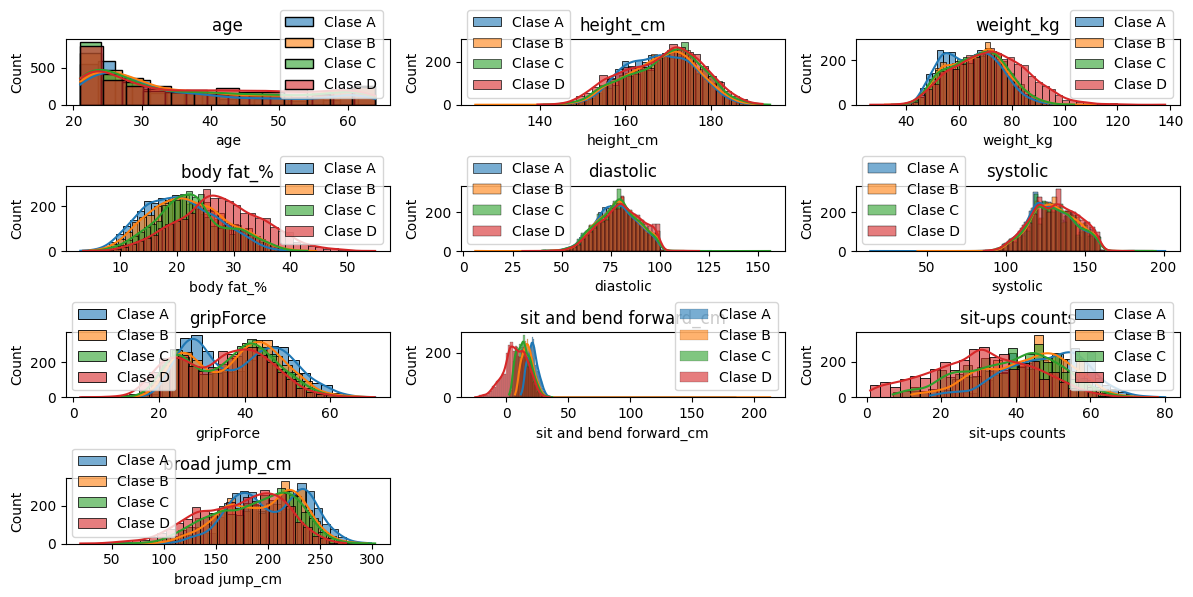

In [ ]:
# Histograma de caracteristicas

# class no es una caracteristica, la evitamos
gruposClase = dataBody2.groupby('class')

# Obtener las características (columnas) del conjunto de datos
caracteristicas = dataBody2.drop(['gender', 'class'], axis = 1).columns  # Excluir la columna de clase y genero

# Definir el tamaño del gráfico y el número de filas y columnas
plt.figure(figsize = (12, 6))
num_filas = 4
num_columnas = 3

# Iterar sobre cada característica y trazar un histograma para cada clase
for i, caracteristica in enumerate(caracteristicas):
    plt.subplot(num_filas, num_columnas, i + 1)
    for clase, grupo in gruposClase:
        sns.histplot(grupo[caracteristica], kde = True, label = f'Clase {clase}', alpha = 0.6)
    plt.title(caracteristica)
    plt.legend()

plt.tight_layout()
plt.show()

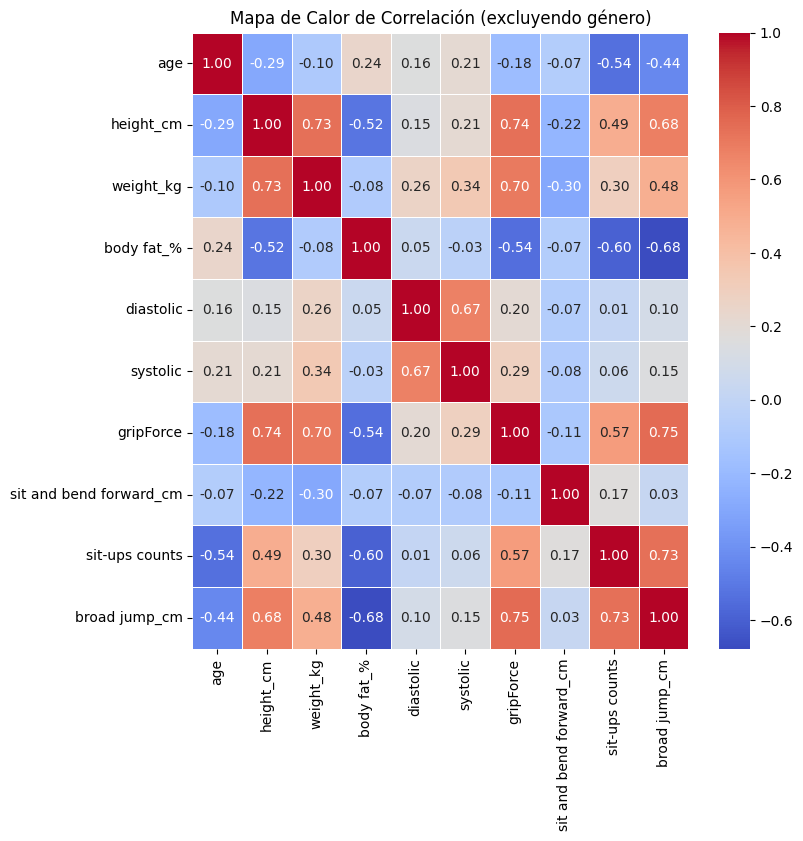

In [ ]:
# Grafica De Calor

# Excluir la columna de género
NoGenero = dataBody2.select_dtypes(include = 'number')

# Calcular la matriz de correlación
matrizCorrelacion = NoGenero.corr()

# Mapa de calor
plt.figure(figsize = (8, 8))
sns.heatmap(matrizCorrelacion, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Mapa de Calor de Correlación (excluyendo género)")
plt.show()

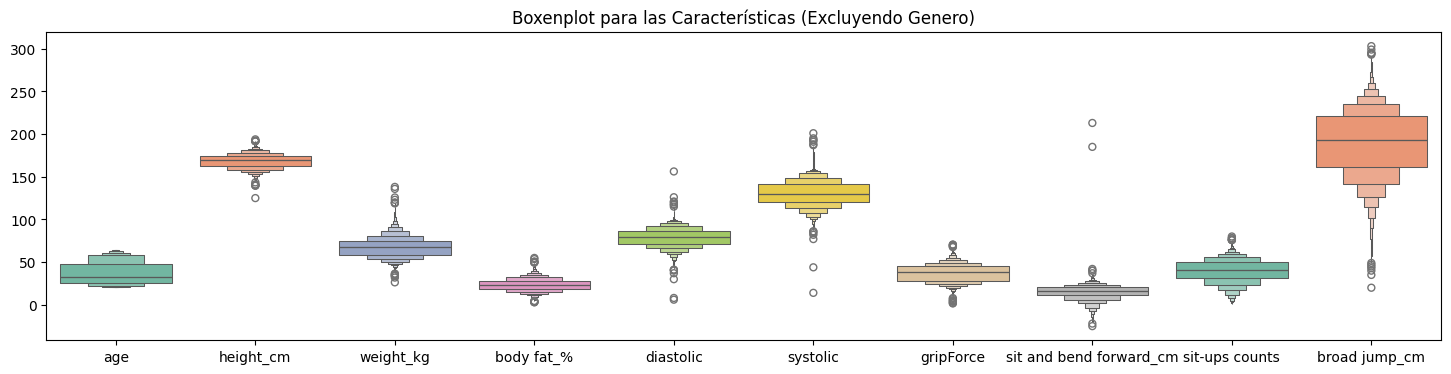

In [ ]:
# Grafica Boxenplot

plt.figure(figsize = (18, 4))
sns.boxenplot(data = dataBody2, palette = "Set2")
plt.title("Boxenplot para las Características (Excluyendo Genero)")
plt.show()

## Caracteristicas - Feature Selection (Etapa 2)



* **Information Gain:** La ganancia de información calcula la reducción de entropía a partir de la transformación de un conjunto de datos. Se puede utilizar para la selección de características evaluando la ganancia de información de cada variable en el contexto de la variable objetivo.

                   Feature  Mutual_Info_Score
7  sit and bend forward_cm           0.309864
8           sit-ups counts           0.134922
3               body fat_%           0.080551
9            broad jump_cm           0.048400
2                weight_kg           0.039278
6                gripForce           0.035376
5                 systolic           0.012084
0                      age           0.007481
1                height_cm           0.007127
4                diastolic           0.002067


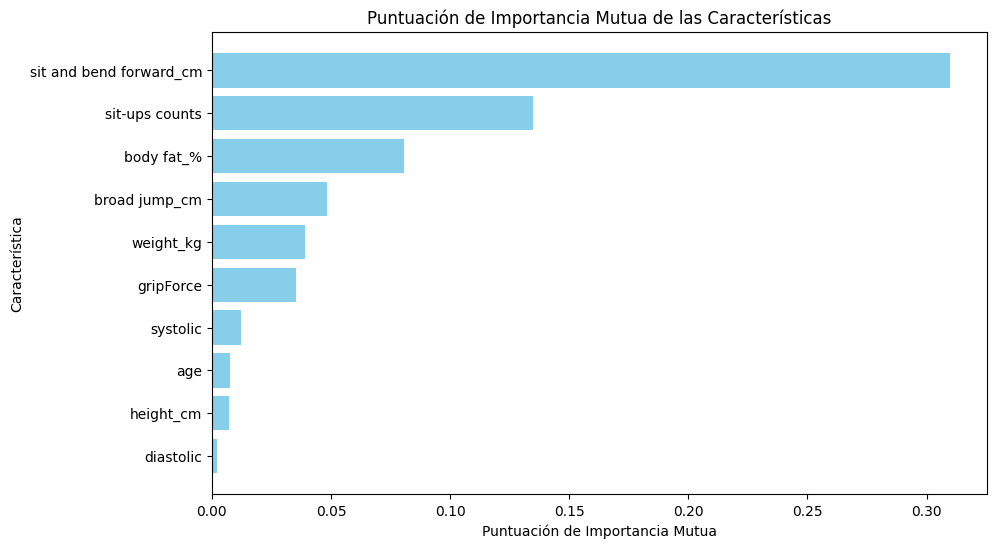

In [ ]:
# Division del conjunto de datos en características (X) y la variable objetivo (y)
X = dataBody2.drop(columns = ['class', 'gender'])
y = dataBody2['class']

# Calcula la importancia mutua de las características con respecto a la variable objetivo
feature_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Crea un DataFrame para visualizar las puntuaciones de importancia mutua por característica
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Visualiza las puntuaciones de importancia mutua
print(feature_scores_df)

# Gráfica de barras de las puntuaciones de importancia mutua
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Puntuación de Importancia Mutua')
plt.ylabel('Característica')
plt.title('Puntuación de Importancia Mutua de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

**Fisher's Score**:La idea clave de la puntuación de Fisher es encontrar un subconjunto de características, de modo que en el espacio de datos abarcado por las características seleccionadas, las distancias entre puntos de datos de diferentes clases sean lo más grandes posible, mientras que las distancias entre puntos de datos de la misma clase sean lo más pequeños posibles.

                   Feature  Fisher_Score        P-Value
4                   H(mag)   7768.437381   0.000000e+00
2         V relative(km/s)   1093.065514   0.000000e+00
3         V infinity(km/s)   1082.960655   0.000000e+00
1  CA DistanceMinimum (au)    129.006355  3.683214e-162
0  CA DistanceNominal (au)    126.162538  1.496387e-158


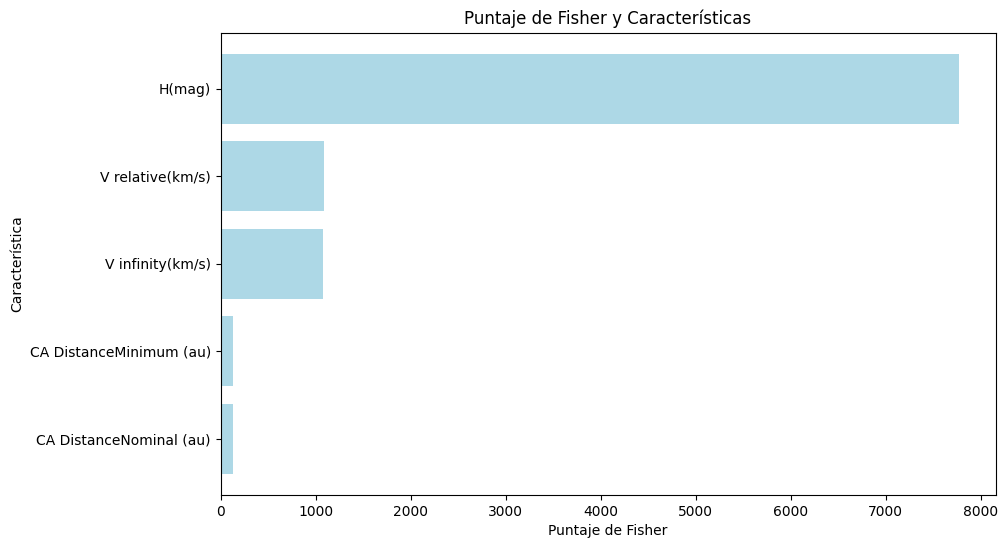

In [ ]:
# Calcular el puntaje de Fisher
f_scores, p_values = f_classif(X, y)

# Crear un DataFrame para visualizar los puntajes de Fisher
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores, 'P-Value': p_values})

# Ordenar por puntaje de Fisher en orden descendente
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Visualizar la tabla de resultados
print(fisher_scores_df)

# Crear una figura y ejes para graficar los puntajes de Fisher
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Barra para todas las características
plt.barh(fisher_scores_df['Feature'], fisher_scores_df['Fisher_Score'], color='lightblue')
plt.xlabel('Puntaje de Fisher')
plt.ylabel('Característica')
plt.title('Puntaje de Fisher y Características')

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()

**Variance Threshold**: El umbral de variación es un enfoque básico simple para la selección de características. Elimina todas las funciones cuya variación no alcanza algún umbral. De forma predeterminada, elimina todas las características de variación cero, es decir, características con el mismo valor en todas las muestras. Suponemos que las características con una varianza más alta pueden contener información más útil, pero tenga en cuenta que no estamos tomando en cuenta la relación entre las variables de características o las variables de características y de destino, lo cual es uno de los inconvenientes de los métodos de filtrado.

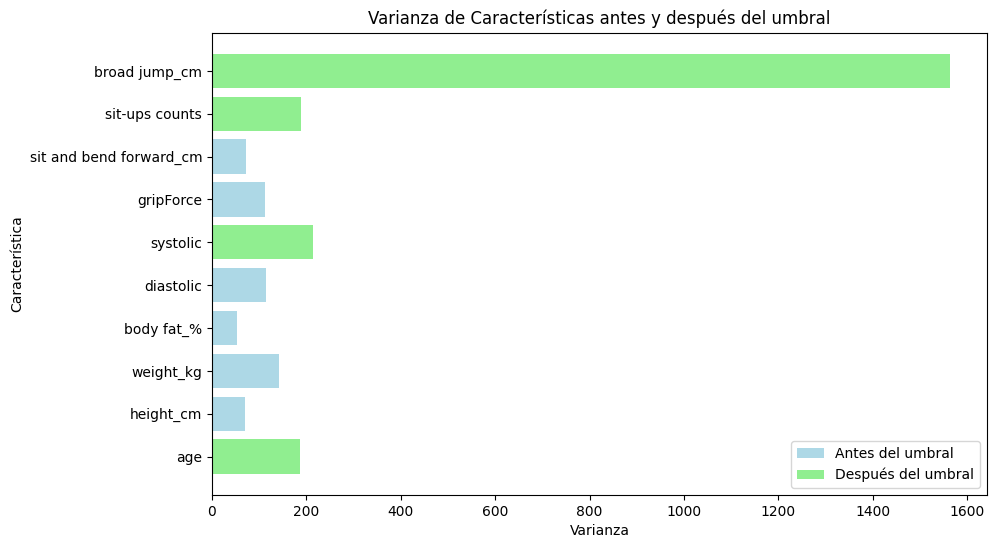

Características seleccionadas:
Index(['age', 'systolic', 'sit-ups counts', 'broad jump_cm'], dtype='object')
Dimensiones del DataFrame con características de alta varianza: (13392, 4)


In [ ]:
# Calcular la varianza de cada característica antes de aplicar el umbral
variances_before = X.var()

# Crear un objeto VarianceThreshold con un umbral específico (ajusta el valor según tus necesidades)
threshold = 150  # Ejemplo de umbral, puedes ajustarlo
variance_selector = VarianceThreshold(threshold)

# Ajustar el selector a tus datos
X_high_variance = variance_selector.fit_transform(X)

# Obtener las características seleccionadas
selected_features = X.columns[variance_selector.get_support()]

# Calcular la varianza de cada característica después de aplicar el umbral
variances_after = X[selected_features].var()

# Crear un gráfico para comparar la varianza antes y después de aplicar el umbral
plt.figure(figsize=(10, 6))
plt.barh(X.columns, variances_before, color='lightblue', label='Antes del umbral')
plt.barh(selected_features, variances_after, color='lightgreen', label='Después del umbral')
plt.xlabel('Varianza')
plt.ylabel('Característica')
plt.title('Varianza de Características antes y después del umbral')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir las características seleccionadas
print('Características seleccionadas:')
print(selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
high_variance = dataBody2[selected_features]

# Verificar las dimensiones del nuevo DataFrame
print('Dimensiones del DataFrame con características de alta varianza:', high_variance.shape)

**Metodo de la diferencia absoluta (MAD)**: Es una medida estadística utilizada para evaluar la dispersión o variabilidad de un conjunto de datos. Proporciona una medida robusta de la variabilidad de los datos al calcular la diferencia absoluta entre cada punto de datos y la media de esos datos, y luego tomando la media de esas diferencias absolutas.

 El MAD es una medida de dispersión robusta que es menos sensible a valores atípicos o extremos en los datos que otras medidas de dispersión, como la desviación estándar. Por lo tanto, se utiliza a menudo cuando se desea evaluar la variabilidad de un conjunto de datos sin verse afectado significativamente por valores atípicos.

                                         Feature  MAD_Score
broad jump_cm                      broad jump_cm  32.603936
systolic                                systolic  12.015281
age                                          age  11.844625
sit-ups counts                    sit-ups counts  11.255019
weight_kg                              weight_kg   9.679553
gripForce                              gripForce   9.061333
diastolic                              diastolic   8.645402
height_cm                              height_cm   6.918687
sit and bend forward_cm  sit and bend forward_cm   6.255898
body fat_%                            body fat_%   5.829284


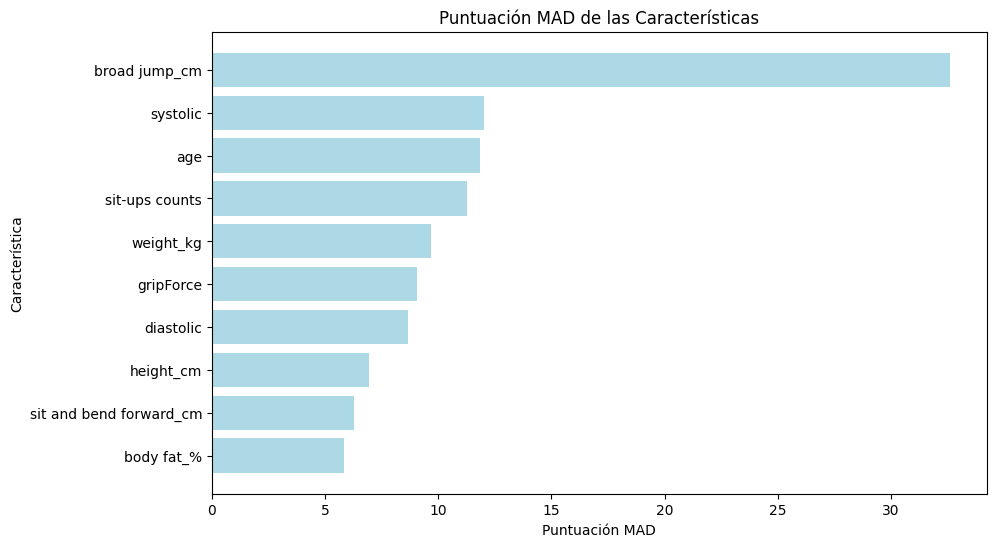

In [ ]:
# Calcular la Mean Absolute Difference (MAD) para cada característica
mean_absolute_differences = np.mean(np.abs(X - np.mean(X, axis=0)), axis=0)

# Crear un DataFrame para visualizar las puntuaciones MAD por característica
mad_scores_df = pd.DataFrame({'Feature': X.columns, 'MAD_Score': mean_absolute_differences})

# Ordenar por puntuación MAD en orden descendente
mad_scores_df = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

# Visualizar la tabla de puntuaciones MAD
print(mad_scores_df)

# Gráfica de barras de las puntuaciones MAD
plt.figure(figsize=(10, 6))
plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')
plt.xlabel('Puntuación MAD')
plt.ylabel('Característica')
plt.title('Puntuación MAD de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

Despues de toda estas metodologias de analisis de datos para elegir las caracteristicas se decidio a elegir las siguientes para la creacion de una prueba momentanea de una grafica de datos

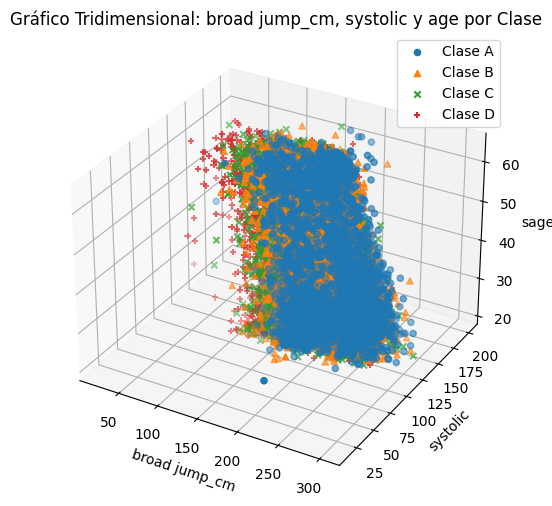

In [ ]:
# Grafica tridimensional de caracteristicas seleccionadas

# Filtrar datos para cada clase
claseA = dataBody2[dataBody2['class'] == 'A']
claseB = dataBody2[dataBody2['class'] == 'B']
claseC = dataBody2[dataBody2['class'] == 'C']
claseD = dataBody2[dataBody2['class'] == 'D']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar Clase A
ax.scatter(claseA['broad jump_cm'], claseA['systolic'], claseA['age'], label='Clase A', marker='o')

# Graficar Clase B
ax.scatter(claseB['broad jump_cm'], claseB['systolic'], claseB['age'], label='Clase B', marker='^')

# Graficar Clase C
ax.scatter(claseC['broad jump_cm'], claseC['systolic'], claseC['age'], label='Clase C', marker='x')

# Graficar Clase D
ax.scatter(claseD['broad jump_cm'], claseD['systolic'], claseD['age'], label='Clase D', marker='+')

# ejes
ax.set_xlabel('broad jump_cm')
ax.set_ylabel('systolic')
ax.set_zlabel('sage')
ax.set_title('Gráfico Tridimensional: broad jump_cm, systolic y age por Clase')
ax.legend()
plt.show()

In [ ]:
 # Grafica tridimensional de caracteristicas seleccionadas Interactiva

# Filtrar datos para cada clase
claseA = dataBody2[dataBody2['class'] == 'A']
claseB = dataBody2[dataBody2['class'] == 'B']
claseC = dataBody2[dataBody2['class'] == 'C']
claseD = dataBody2[dataBody2['class'] == 'D']

# Crear la figura
fig = go.Figure()

# Graficar Clase A
fig.add_trace(go.Scatter3d(
    x=claseA['broad jump_cm'],
    y=claseA['systolic'],
    z=claseA['age'],
    mode='markers',
    name='Clase A',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase B
fig.add_trace(go.Scatter3d(
    x=claseB['broad jump_cm'],
    y=claseB['systolic'],
    z=claseB['age'],
    mode='markers',
    name='Clase B',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase C
fig.add_trace(go.Scatter3d(
    x=claseC['broad jump_cm'],
    y=claseC['systolic'],
    z=claseC['age'],
    mode='markers',
    name='Clase C',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase D
fig.add_trace(go.Scatter3d(
    x=claseD['broad jump_cm'],
    y=claseD['systolic'],
    z=claseD['age'],
    mode='markers',
    name='Clase D',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Actualizar diseño del gráfico
fig.update_layout(
    title='Gráfico Tridimensional: broad jump_cm, systolic y age por Clase',
    scene=dict(
        xaxis=dict(title='broad jump_cm'),
        yaxis=dict(title='systolic'),
        zaxis=dict(title='age')
    )
)

# Mostrar el gráfico
fig.show()

## Entrenamientos - 3 Caracteristicas (Etapa 3)

In [ ]:
# Estandarizacion
features = dataBody2[['broad jump_cm', 'systolic', 'age']]
y = dataBody2['class']

scaler = StandardScaler()
X_std = scaler.fit_transform(features)
print(X_std)
print(y)

[[ 0.67634718 -0.01686753 -0.71747269]
 [ 0.97985607 -0.28960783 -0.86425761]
 [-0.23417949  1.48320414 -0.42390284]
 ...
 [ 0.97985607  0.11950262  0.16323685]
 [-2.91517469 -0.63053321  1.99804838]
 [-0.2594719   1.34683399 -0.20372546]]
0        C
1        A
2        C
3        B
4        B
        ..
13388    C
13389    D
13390    A
13391    D
13392    C
Name: class, Length: 13392, dtype: object


In [ ]:
# Entrenamientos y testeos
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.25, random_state = 42)

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std)

[[-0.45741947  0.32373937 -0.43016716]
 [-0.60887855  1.48078233  1.39808513]
 [-0.48266265 -1.03748764 -0.72268752]
 ...
 [-0.20498768 -0.96942629 -0.72268752]
 [-0.60887855  0.52792342 -1.16146807]
 [ 0.88046904 -1.58197845 -1.08833798]]


In [ ]:
promedio_XA = X_train_std[:,0].mean()
desv_estand_XA2 = X_train_std[:,0].std()
promedio_XB = X_train_std[:,1].mean()
desv_estand_XB2 = X_train_std[:,1].std()
promedio_XC = X_train_std[:,2].mean()
desv_estand_XC2 = X_train_std[:,2].std()

print("Promedio de la característica 1: " + str(promedio_XA))
print("Desviacion estandar de la característica 1: " + str(desv_estand_XA2))
print("Promedio de la característica 2: " + str(promedio_XB))
print("Desviacion estandar de la característica 2: " + str(desv_estand_XB2))
print("Promedio de la característica 3: " + str(promedio_XC))
print("Desviacion estandar de la característica 3: " + str(desv_estand_XC2))

Promedio de la característica 1: -2.3698906459541375e-16
Desviacion estandar de la característica 1: 1.0
Promedio de la característica 2: 3.749379230912516e-16
Desviacion estandar de la característica 2: 0.9999999999999999
Promedio de la característica 3: -9.72716309906549e-18
Desviacion estandar de la característica 3: 1.0


### PERCEPTRON (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Perceptron

ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Cantidad de muestras de clasificación erronea: %d' % (y_test != y_pred).sum())

Cantidad de muestras de clasificación erronea: 2569


In [ ]:
# Evaluacion de precision

accuracy_ppn = accuracy_score(y_test, y_pred)
print("Precision del modelo de perceptron:", accuracy_ppn)

Precision del modelo de perceptron: 0.23267622461170848


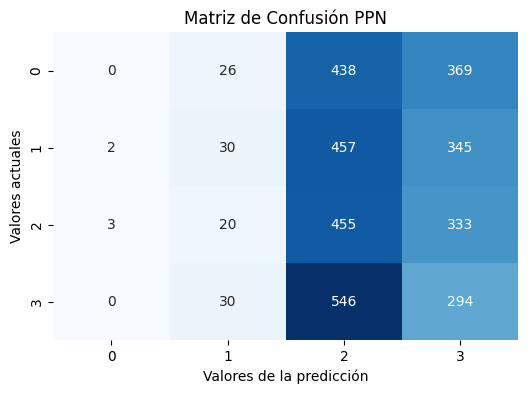

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión PPN')
plt.show()

### Adaline (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Adaline

adaline = SGDClassifier(eta0 = 0.1, max_iter = 40, random_state = 42, loss = 'squared_error', learning_rate = 'constant')
adaline.fit(X_train_std, y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='squared_error',
              max_iter=40, random_state=42)

In [ ]:
y_pred2 = adaline.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred2).sum())

Cantidad de muestras de clasificación errónea: 2517


In [ ]:
# Evaluacion de precision

accuracy_ada = accuracy_score(y_test, y_pred2)
print("Precision del modelo adaline:", accuracy_ada)

Precision del modelo adaline: 0.2482078853046595


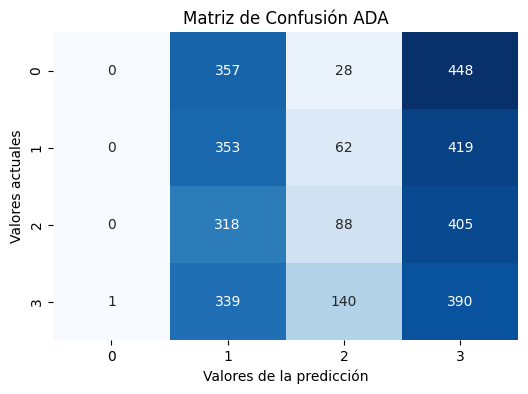

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión ADA')
plt.show()

### Logistic Regression (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Logistic Regresion

lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [ ]:
y_pred3 = lr.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred3).sum())

Cantidad de muestras de clasificación errónea: 2287


In [ ]:
# Evaluacion de precision

accuracy_lr = accuracy_score(y_test, y_pred3)
print("Precision del modelo lr:", accuracy_lr)

Precision del modelo lr: 0.31690561529271205


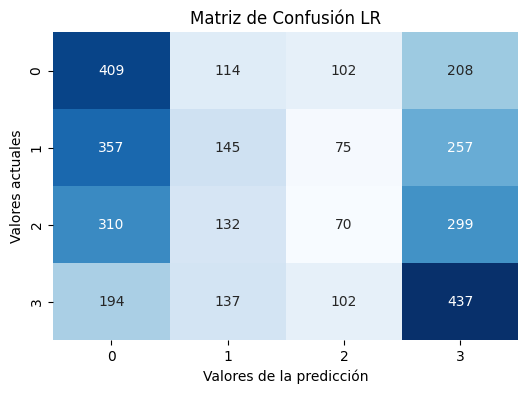

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión LR')
plt.show()

### SVC (vía SCI-KIT learn)

In [ ]:
# Entrenamientos SVC con kernel lineal
svm = SVC(kernel = 'linear', C = 10.0, random_state = 1)
svm.fit(X_train_std, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [ ]:
# Entrenamiento con kernel polinómico
svm_poly = SVC(kernel = 'poly', degree = 3, C = 10.0, random_state = 1)
svm_poly.fit(X_train_std, y_train)

SVC(C=10.0, kernel='poly', random_state=1)

In [ ]:
# Entrenamiento con kernel gaussiano (RBF)
svm_rbf = SVC(kernel = 'rbf', gamma = 0.1, C = 10.0, random_state = 1)
svm_rbf.fit(X_train_std, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [ ]:
y_pred4 = svm.predict(X_test_std)
y_pred4_poly = svm_poly.predict(X_test_std)
y_pred4_rbf = svm_rbf.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred4).sum())
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred4_poly).sum())
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred4_rbf).sum())

Cantidad de muestras de clasificación errónea: 2316
Cantidad de muestras de clasificación errónea: 2244
Cantidad de muestras de clasificación errónea: 2150


In [ ]:
# Evaluacion de precision

accuracy_svm = accuracy_score(y_test, y_pred4)
accuracy_svm_poly = accuracy_score(y_test, y_pred4_poly)
accuracy_svm_rbf = accuracy_score(y_test, y_pred4_rbf)
print("Precision del modelo SVC:", accuracy_svm)
print("Precision del modelo SVC polinomico:", accuracy_svm_poly)
print("Precision del modelo SVC gaussiano:", accuracy_svm_rbf)

Precision del modelo SVC: 0.30824372759856633
Precision del modelo SVC polinomico: 0.32974910394265233
Precision del modelo SVC gaussiano: 0.3578255675029869


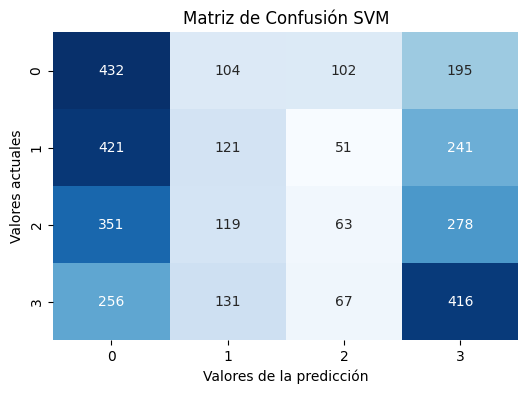

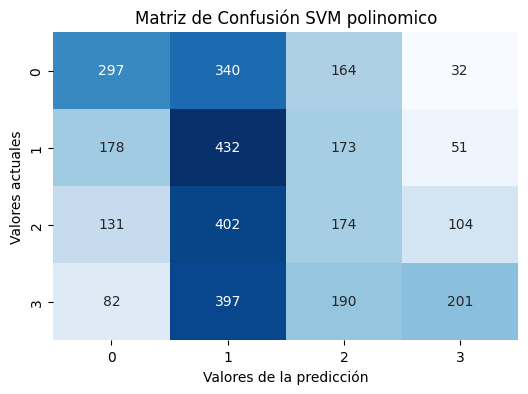

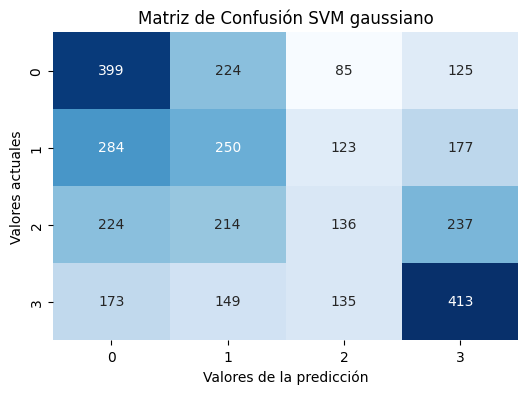

In [ ]:
# Grafica Matriz Confusion SVM

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM')
plt.show()

# Grafica Matriz Confusion polinomico

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred4_poly), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM polinomico')
plt.show()

# Grafica Matriz Confusion gaussiano

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred4_rbf), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM gaussiano')
plt.show()

### KNN (vía SCI-KIT learn)

In [ ]:
# Entrenamiendo KNN con algoritmo de fuerza bruta

knn = KNeighborsClassifier(algorithm = 'brute')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='brute')

In [ ]:
y_pred5 = knn.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred5).sum())

Cantidad de muestras de clasificación errónea: 2292


In [ ]:
# Evaluacion de precision

accuracy_knn = accuracy_score(y_test, y_pred5)
print("Precision del modelo SVC:", accuracy_knn)

Precision del modelo SVC: 0.3154121863799283


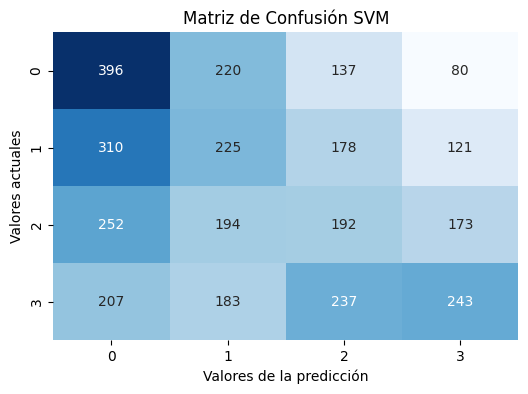

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred5), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM')
plt.show()

### Decision Tree (vía SCI-KIT learn)

In [ ]:
# Entrenamiendo DecisionTreeClassifier con entropy

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
y_pred6 = tree.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred6).sum())

Cantidad de muestras de clasificación errónea: 2108


In [ ]:
# Evaluacion de precision

accuracy_tree = accuracy_score(y_test, y_pred6)
print("Precision del modelo SVC:", accuracy_tree)

Precision del modelo SVC: 0.37037037037037035


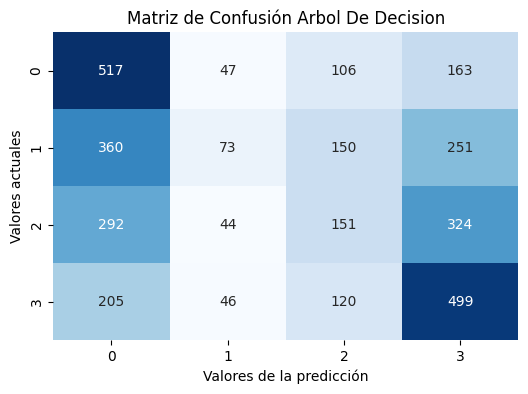

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred6), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Arbol De Decision')
plt.show()

### Random Forest ((vía SCI-KIT learn))

In [ ]:
# Entrenamiendo RandomForest con entropy

forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = None, random_state = 1, n_jobs = -1)
forest.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=1)

In [ ]:
y_pred7 = forest.predict(X_test_std)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test != y_pred7).sum())

Cantidad de muestras de clasificación errónea: 2255


In [ ]:
# Evaluacion de precision

accuracy_forest = accuracy_score(y_test, y_pred7)
print("Precision del modelo SVC:", accuracy_forest)

Precision del modelo SVC: 0.32646356033452806


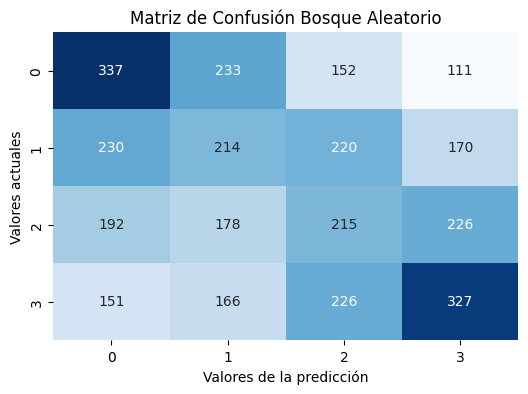

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred7), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Bosque Aleatorio')
plt.show()

## PIPELINE/PCA/LCA/KPCA vía Scikit-learn (3 Caracteristicas)

### PCA

In [ ]:
# Validar la relación de varianza explicada de todos los componentes principales:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.48176689, 0.37095557, 0.14727754])

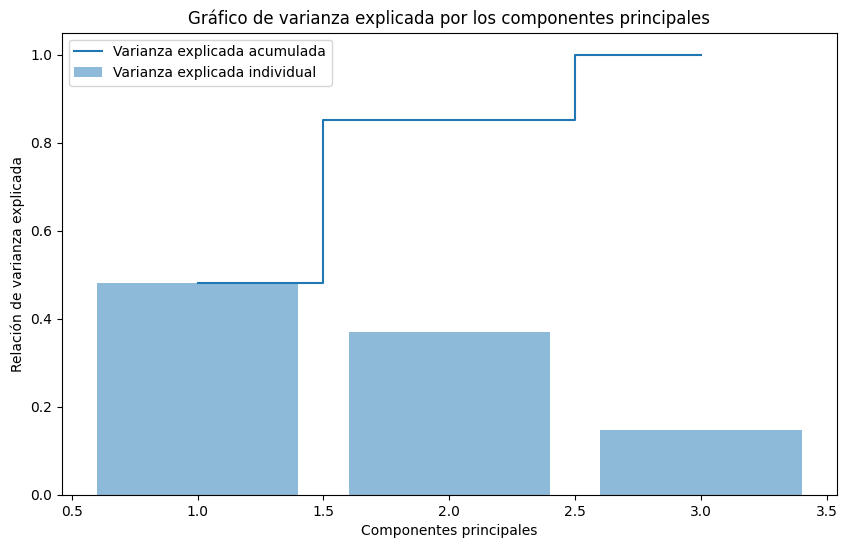

In [ ]:
if hasattr(pca, 'explained_variance_ratio_'):
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.title('Gráfico de varianza explicada por los componentes principales')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto PCA no tiene el atributo 'explained_variance_ratio_'. Asegúrate de haber ajustado el PCA correctamente.")

In [ ]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# Para obtener la matriz de proyección W
W = pca.components_
print(W)

[[-0.67196468  0.13577301  0.72803102]
 [-0.39569133 -0.89679153 -0.19797304]
 [ 0.62601265 -0.42110645  0.65633643]]


In [ ]:
print(W.T)

[[-0.67196468 -0.39569133  0.62601265]
 [ 0.13577301 -0.89679153 -0.42110645]
 [ 0.72803102 -0.19797304  0.65633643]]


### ICA

In [ ]:
# Ajustar el ICA para usar tres componentes
ica = FastICA(n_components=3, random_state=0)
X_train_ica = ica.fit_transform(X_train_std)

# Verificar los componentes independientes
print(X_train_ica[:5])

[[-0.00702548  0.00605292  0.00511473]
 [-0.0005998   0.01362693 -0.01283139]
 [-0.00853265 -0.00747347  0.00696123]
 [ 0.0003687  -0.0082776  -0.01033192]
 [ 0.00599804 -0.00144077  0.01127089]]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



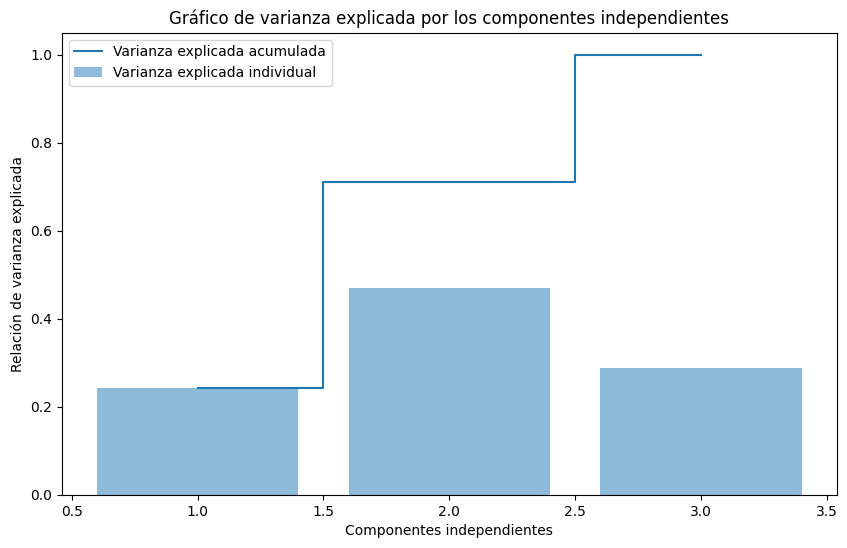

In [ ]:
if hasattr(ica, 'components_'):
    components_variances = np.var(ica.components_, axis=1)
    explained_variance_ratio = components_variances / np.sum(components_variances)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes independientes')
    plt.title('Gráfico de varianza explicada por los componentes independientes')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto ICA no tiene el atributo 'components_'. Asegúrate de haber ajustado el ICA correctamente.")

### KPCA

In [ ]:
# Ajustar el KPCA para usar tres componentes
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
X_train_kpca = kpca.fit_transform(X_train_std)

# Obtener los autovalores (eigenvalues) de la matriz de kernel
eigenvalues = kpca.eigenvalues_

# Calcular la varianza explicada
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Calcular la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Mostrar la relación de varianza explicada
print("Relación de varianza explicada de cada componente:")
print(explained_variance_ratio)
print("Varianza explicada acumulada:")
print(cumulative_variance_ratio)

Relación de varianza explicada de cada componente:
[0.46557751 0.36286042 0.17156207]
Varianza explicada acumulada:
[0.46557751 0.82843793 1.        ]


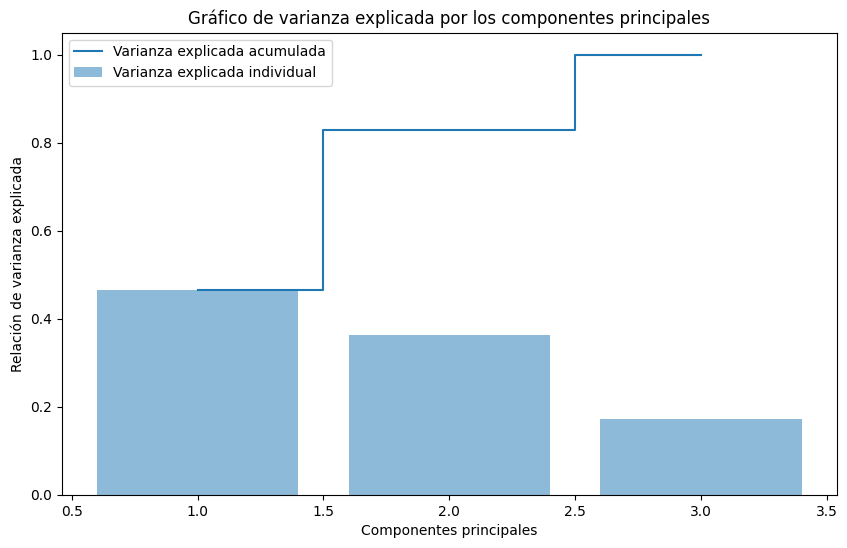

In [ ]:
# Verificar si el objeto KPCA tiene el atributo 'eigenvalues_' (varianza explicada)
if hasattr(kpca, 'eigenvalues_'):
    explained_variance_ratio = kpca.eigenvalues_ / np.sum(kpca.eigenvalues_)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.title('Gráfico de varianza explicada por los componentes principales')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto KPCA no tiene el atributo 'lambdas_'. Asegúrate de haber ajustado el KPCA correctamente.")

### PIPELINE

In [ ]:
# Creacion de pipeline

# Perceptron
pipe_ppnA = make_pipeline(StandardScaler(), PCA(n_components = 2), ppn)
pipe_ppnB = make_pipeline(StandardScaler(), PCA(n_components = 3), ppn)

# Adaline
pipe_adaA = make_pipeline(StandardScaler(), PCA(n_components = 2), adaline)
pipe_adaB = make_pipeline(StandardScaler(), PCA(n_components = 3), adaline)

# Logistic Regresion
pipe_lrA = make_pipeline(StandardScaler(), PCA(n_components = 2), lr)
pipe_lrB = make_pipeline(StandardScaler(), PCA(n_components = 3), lr)

# SVM
pipe_svmA = make_pipeline(StandardScaler(), PCA(n_components = 2), svm)
pipe_svmB = make_pipeline(StandardScaler(), PCA(n_components = 3), svm)

# SVM Polinomico
pipe_svmPolyA = make_pipeline(StandardScaler(), PCA(n_components = 2), svm_poly)
pipe_svmPolyB = make_pipeline(StandardScaler(), PCA(n_components = 3), svm_poly)

# CVM Gaussiano
pipe_svmRbfA = make_pipeline(StandardScaler(), PCA(n_components = 2), svm_rbf)
pipe_svmRbfB = make_pipeline(StandardScaler(), PCA(n_components = 3), svm_rbf)

# KNN
pipe_knnA = make_pipeline(StandardScaler(), PCA(n_components = 2), knn)
pipe_knnB = make_pipeline(StandardScaler(), PCA(n_components = 3), knn)

# Decision Tree
pipe_treeA = make_pipeline(StandardScaler(), PCA(n_components = 2), tree)
pipe_treeB = make_pipeline(StandardScaler(), PCA(n_components = 3), tree)

# Random Forest
pipe_forestA = make_pipeline(StandardScaler(), PCA(n_components = 2), forest)
pipe_forestB = make_pipeline(StandardScaler(), PCA(n_components = 3), forest)

# Nota: Se esta usando los modelos entrenados y estandarizados ya anteriormente.

In [ ]:
# Entrenamiento pipelines

# Nota: La precision se encuentra en cada modelo calculado

print(f'Exactitud del dataset de testeo Perceptron: {accuracy_ppn * 100:.2f}%')
print(f'Exactitud del dataset de testeo Adaline: {accuracy_ada * 100:.2f}%')
print(f'Exactitud del dataset de testeo Logistic Regression: {accuracy_lr * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM: {accuracy_svm * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM Polinomico: {accuracy_svm_poly * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM Gaussiano: {accuracy_svm_rbf * 100:.2f}%')
print(f'Exactitud del dataset de testeo KNN: {accuracy_knn * 100:.2f}%')
print(f'Exactitud del dataset de testeo Decision Tree: {accuracy_tree * 100:.2f}%')
print(f'Exactitud del dataset de testeo Random Forest: {accuracy_forest * 100:.2f}%')

Exactitud del dataset de testeo Perceptron: 23.27%
Exactitud del dataset de testeo Adaline: 24.82%
Exactitud del dataset de testeo Logistic Regression: 31.69%
Exactitud del dataset de testeo SVM: 30.82%
Exactitud del dataset de testeo SVM Polinomico: 32.97%
Exactitud del dataset de testeo SVM Gaussiano: 35.78%
Exactitud del dataset de testeo KNN: 31.54%
Exactitud del dataset de testeo Decision Tree: 37.04%
Exactitud del dataset de testeo Random Forest: 32.65%


In [ ]:
# Crear pipelines
pipelines_2 = {
    'ppn': make_pipeline(StandardScaler(), PCA(n_components=2), ppn),
    'adaline': make_pipeline(StandardScaler(), PCA(n_components=2), adaline),
    'lr': make_pipeline(StandardScaler(), PCA(n_components=2), lr),
    'svm': make_pipeline(StandardScaler(), PCA(n_components=2), svm),
    'svm_poly': make_pipeline(StandardScaler(), PCA(n_components=2), svm_poly),
    'svm_rbf': make_pipeline(StandardScaler(), PCA(n_components=2), svm_rbf),
    'knn': make_pipeline(StandardScaler(), PCA(n_components=2), knn),
    'tree': make_pipeline(StandardScaler(), PCA(n_components=2), tree),
    'forest': make_pipeline(StandardScaler(), PCA(n_components=2), forest),
}

pipelines_3 = {
    'ppn': make_pipeline(StandardScaler(), PCA(n_components=3), ppn),
    'adaline': make_pipeline(StandardScaler(), PCA(n_components=3), adaline),
    'lr': make_pipeline(StandardScaler(), PCA(n_components=3), lr),
    'svm': make_pipeline(StandardScaler(), PCA(n_components=3), svm),
    'svm_poly': make_pipeline(StandardScaler(), PCA(n_components=3), svm_poly),
    'svm_rbf': make_pipeline(StandardScaler(), PCA(n_components=3), svm_rbf),
    'knn': make_pipeline(StandardScaler(), PCA(n_components=3), knn),
    'tree': make_pipeline(StandardScaler(), PCA(n_components=3), tree),
    'forest': make_pipeline(StandardScaler(), PCA(n_components=3), forest),
}

# Crear el objeto StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Función para evaluar los pipelines
def evaluar_pipelines(pipelines, X, y):
    resultados = {}
    for nombre, pipeline in pipelines.items():
        scores = []
        for train_index, test_index in kfold.split(X, y):
            pipeline.fit(X.iloc[train_index], y.iloc[train_index])
            score = pipeline.score(X.iloc[test_index], y.iloc[test_index])
            scores.append(score)
        resultados[nombre] = {
            'scores': scores,
            'mean': np.mean(scores),
            'std': np.std(scores)
        }
        print(f'{nombre} - Validación cruzada: Exactitud: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
    return resultados

# Evaluar pipelines con PCA n=2
resultados_2 = evaluar_pipelines(pipelines_2, X_train, y_train)

# Evaluar pipelines con PCA n=3
resultados_3 = evaluar_pipelines(pipelines_3, X_train, y_train)

# Seleccionar los mejores modelos
mejor_modelo_2 = max(resultados_2, key=lambda x: resultados_2[x]['mean'])
mejor_modelo_3 = max(resultados_3, key=lambda x: resultados_3[x]['mean'])

print(f'\nMejor modelo con PCA n=2: {mejor_modelo_2} con exactitud de {resultados_2[mejor_modelo_2]["mean"]:.3f}')
print(f'Mejor modelo con PCA n=3: {mejor_modelo_3} con exactitud de {resultados_3[mejor_modelo_3]["mean"]:.3f}')

ppn - Validación cruzada: Exactitud: 0.257 +/- 0.018
adaline - Validación cruzada: Exactitud: 0.255 +/- 0.021
lr - Validación cruzada: Exactitud: 0.302 +/- 0.013
svm - Validación cruzada: Exactitud: 0.304 +/- 0.009
svm_poly - Validación cruzada: Exactitud: 0.290 +/- 0.010
svm_rbf - Validación cruzada: Exactitud: 0.315 +/- 0.010
knn - Validación cruzada: Exactitud: 0.278 +/- 0.016
tree - Validación cruzada: Exactitud: 0.312 +/- 0.008
forest - Validación cruzada: Exactitud: 0.293 +/- 0.015
ppn - Validación cruzada: Exactitud: 0.271 +/- 0.023
adaline - Validación cruzada: Exactitud: 0.252 +/- 0.021
lr - Validación cruzada: Exactitud: 0.317 +/- 0.010
svm - Validación cruzada: Exactitud: 0.307 +/- 0.012
svm_poly - Validación cruzada: Exactitud: 0.324 +/- 0.017
svm_rbf - Validación cruzada: Exactitud: 0.354 +/- 0.012
knn - Validación cruzada: Exactitud: 0.319 +/- 0.014
tree - Validación cruzada: Exactitud: 0.335 +/- 0.013
forest - Validación cruzada: Exactitud: 0.335 +/- 0.011

Mejor modelo 

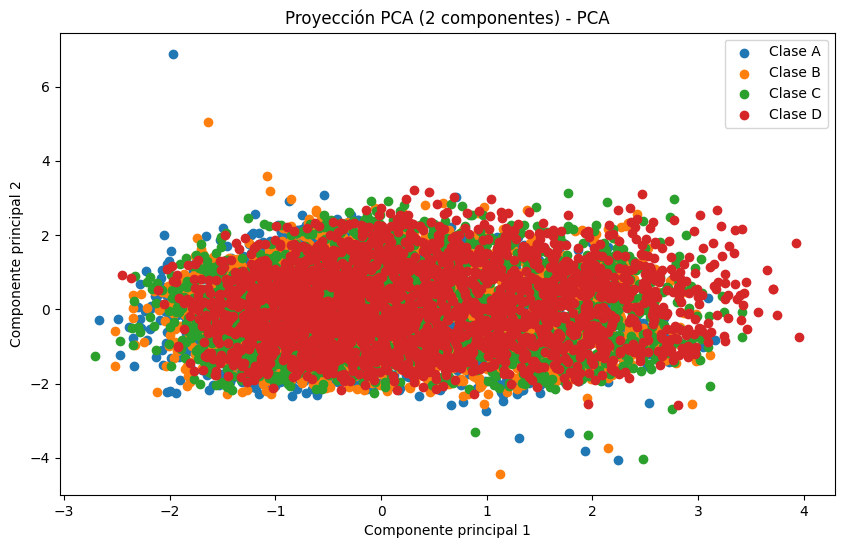

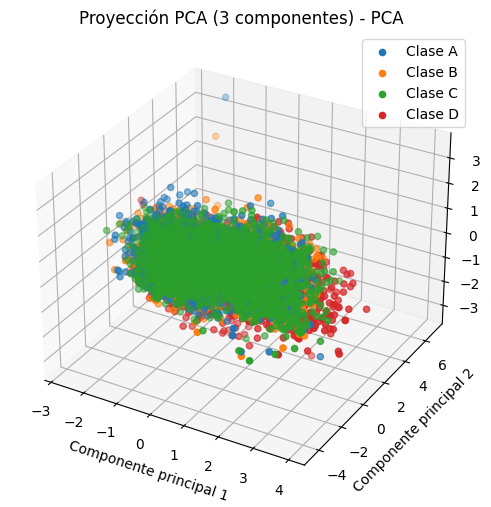

In [ ]:
# Función para graficar el PCA
def graficar_pca(pipeline, X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)

    if n_components == 2:
        plt.figure(figsize=(10, 6))
        for i, target_name in enumerate(np.unique(y)):
            plt.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], label=f'Clase {target_name}')
        plt.title(f'Proyección PCA (2 componentes) - {type(pipeline.named_steps["pca"]).__name__}')
        plt.xlabel('Componente principal 1')
        plt.ylabel('Componente principal 2')
        plt.legend()
        plt.show()
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        for i, target_name in enumerate(np.unique(y)):
            ax.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], X_pca[y == target_name, 2], label=f'Clase {target_name}')
        ax.set_title(f'Proyección PCA (3 componentes) - {type(pipeline.named_steps["pca"]).__name__}')
        ax.set_xlabel('Componente principal 1')
        ax.set_ylabel('Componente principal 2')
        ax.set_zlabel('Componente principal 3')
        ax.legend()
        plt.show()

# Crear los pipelines con los mejores modelos identificados
mejor_pipeline_2 = pipelines_2[mejor_modelo_2]
mejor_pipeline_3 = pipelines_3[mejor_modelo_3]

# Graficar PCA n=2
graficar_pca(mejor_pipeline_2, X_train, y_train, n_components=2)

# Graficar PCA n=3
graficar_pca(mejor_pipeline_3, X_train, y_train, n_components=3)

## EDA - Near Earth Objects 1900 to 2200 (Etapa 1)


In [ ]:
# carga base de datos
# uploaded = files.upload()
dataNEO = pd.read_csv("NEO Earth Close Approaches.csv")

In [ ]:
# Verificacion de cantidad de filas y columnas que tiene el csv
print("\n", dataNEO.shape, "\n")
# Verificacion de la info de la tabla csv
dataNEO.info()
# Analisis de las primeras 5 muestras
print("\n", dataNEO.head())

In [ ]:
# Verificacion de datos/registros duplicados

duplicados2 = dataNEO.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados2 = duplicados2.any() # Se verifica si hay algun True de duplicados que inidica que si existe al menos 1 registro duplicado.

if existeDuplicados2:
    print("El dataset tiene registros duplicados.")
    conteo = dataNEO[duplicados2].shape[0]
    print(f"Número de registros duplicados: {conteo}")  # Se devuelve el numero de registros duplicados
else:
    print("El dataset no tiene registros duplicados.")

Como se puede observar el dataset no tiene datos/registros repetidos lo cual facilita y mejora el calculo de la eficencia y exactitud de los entrenamientos.

In [ ]:
# Verificacion de datos nulos

nulos = dataNEO.isnull().sum()
print(nulos)

Como se puede observar, se posee en el dataset datos nulos, por lo cual se procedera a eliminar esos datos para evitar fallos o errores en calculos para el entrenamiento o demas a futuro. Para eso se va a crear otro dataset pero sin estos valores nulos.

In [ ]:
# Eliminacion Datos Nulos

dataNEO2 = dataNEO.dropna()
# Verificacion de cantidad de filas y columnas que tiene el csv
print(dataNEO2.shape)

In [ ]:
# Analisis de datos
dataNEO2.describe()

Como se puede observar con este cambio se mejoro los calculos de los datos y se evita errores al tener datos nulo que son irrelevantes para nuestro proceso.

In [ ]:
# Verificacion de cantidad de valores de 0 en cada caracteristica

print('No. of zero values in CA DistanceNominal (au) is', dataNEO2[dataNEO2['CA DistanceNominal (au)'] == 0].shape[0])
print('No. of zero values in CA DistanceMinimum (au) is', dataNEO2[dataNEO2['CA DistanceMinimum (au)'] == 0].shape[0])
print('No. of zero values in V relative(km/s) is', dataNEO2[dataNEO2['V relative(km/s)'] == 0].shape[0])
print('No. of zero values in V infinity(km/s) is', dataNEO2[dataNEO2['V infinity(km/s)'] == 0].shape[0])
print('No. of zero values in H(mag) is', dataNEO2[dataNEO2['H(mag)'] == 0].shape[0])
print('No. of zero values in Rarity is', dataNEO2[dataNEO2['Rarity'] == 0].shape[0])

No hay problemas con estos datos, puesto que son pocos pero lo que si hay con 0's es que en su rareza significa que son comunes y en la distancia minima es que pasan muy cerca del limite establecido para identificar si es un problema o no. Ademas es bien sabido que muchos de estos objetos como meteoritos efectivamente entran en la orbita del planeta pero son desintegrados mientras entran en ella, por eso existe la distancia 0.

In [ ]:
# Cantidad de muestras por clase
dataNEO2["Rarity"].value_counts().to_frame()

In [ ]:
# Verificacion de proporcionalidad
dataNEO2["Rarity"].value_counts(normalize = True).to_frame()

In [ ]:
# Histograma de caracteristicas

# rarity no es una caracteristica, la evitamos
gruposClase = dataNEO2.groupby('Rarity')

# Obtener las características (columnas) del conjunto de datos
caracteristicas = dataNEO2.drop(['Object', 'Close-Approach (CA) Date', 'Rarity', 'Diameter'], axis = 1).columns  # Excluir las columnas innecesarias

# Definir el tamaño del gráfico y el número de filas y columnas
plt.figure(figsize = (20, 15))
num_filas = 4
num_columnas = 3

# Iterar sobre cada característica y trazar un histograma para cada clase
for i, caracteristica in enumerate(caracteristicas):
    plt.subplot(num_filas, num_columnas, i + 1)
    for clase, grupo in gruposClase:
        sns.histplot(grupo[caracteristica], kde = True, label = f'Clase {clase}', alpha = 0.6)
    plt.title(caracteristica)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Grafica De Calor

# Excluir cualquier dato no numerico (Diameter)
NoDiametro = dataNEO2.select_dtypes(include = 'number')

# Calcular la matriz de correlación
matrizCorrelacion = NoDiametro.corr()

# Mapa de calor
plt.figure(figsize = (8, 8))
sns.heatmap(matrizCorrelacion, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Mapa de Calor de Correlación (excluyendo género)")
plt.show()

In [ ]:
# Grafica Boxenplot

plt.figure(figsize = (15, 2))
sns.boxenplot(data = dataNEO2, palette = "Set2")
plt.title("Boxenplot para las Características")
plt.show()

## Caracteristicas - Feature Selection (Etapa 2)

* **Information Gain:** La ganancia de información calcula la reducción de entropía a partir de la transformación de un conjunto de datos. Se puede utilizar para la selección de características evaluando la ganancia de información de cada variable en el contexto de la variable objetivo.

In [ ]:
# Division del conjunto de datos en características (X) y la variable objetivo (y)
X = dataNEO2.drop(columns = ['Object', 'Close-Approach (CA) Date', 'Rarity', 'Diameter'])
y = dataNEO2['Rarity']

# Calcula la importancia mutua de las características con respecto a la variable objetivo
feature_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Crea un DataFrame para visualizar las puntuaciones de importancia mutua por característica
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Visualiza las puntuaciones de importancia mutua
print(feature_scores_df)

# Gráfica de barras de las puntuaciones de importancia mutua
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Puntuación de Importancia Mutua')
plt.ylabel('Característica')
plt.title('Puntuación de Importancia Mutua de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

**Fisher's Score**:La idea clave de la puntuación de Fisher es encontrar un subconjunto de características, de modo que en el espacio de datos abarcado por las características seleccionadas, las distancias entre puntos de datos de diferentes clases sean lo más grandes posible, mientras que las distancias entre puntos de datos de la misma clase sean lo más pequeños posibles.

In [ ]:
# Calcular el puntaje de Fisher
f_scores, p_values = f_classif(X, y)

# Crear un DataFrame para visualizar los puntajes de Fisher
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores, 'P-Value': p_values})

# Ordenar por puntaje de Fisher en orden descendente
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Visualizar la tabla de resultados
print(fisher_scores_df)

# Crear una figura y ejes para graficar los puntajes de Fisher
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Barra para todas las características
plt.barh(fisher_scores_df['Feature'], fisher_scores_df['Fisher_Score'], color='lightblue')
plt.xlabel('Puntaje de Fisher')
plt.ylabel('Característica')
plt.title('Puntaje de Fisher y Características')

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()

**Variance Threshold**: El umbral de variación es un enfoque básico simple para la selección de características. Elimina todas las funciones cuya variación no alcanza algún umbral. De forma predeterminada, elimina todas las características de variación cero, es decir, características con el mismo valor en todas las muestras. Suponemos que las características con una varianza más alta pueden contener información más útil, pero tenga en cuenta que no estamos tomando en cuenta la relación entre las variables de características o las variables de características y de destino, lo cual es uno de los inconvenientes de los métodos de filtrado.

In [ ]:
# Calcular la varianza de cada característica antes de aplicar el umbral
variances_before = X.var()

# Crear un objeto VarianceThreshold con un umbral específico (ajusta el valor según tus necesidades)
threshold = 25  # Ejemplo de umbral, puedes ajustarlo
variance_selector = VarianceThreshold(threshold)

# Ajustar el selector a tus datos
X_high_variance = variance_selector.fit_transform(X)

# Obtener las características seleccionadas
selected_features = X.columns[variance_selector.get_support()]

# Calcular la varianza de cada característica después de aplicar el umbral
variances_after = X[selected_features].var()

# Crear un gráfico para comparar la varianza antes y después de aplicar el umbral
plt.figure(figsize=(10, 6))
plt.barh(X.columns, variances_before, color='lightblue', label='Antes del umbral')
plt.barh(selected_features, variances_after, color='lightgreen', label='Después del umbral')
plt.xlabel('Varianza')
plt.ylabel('Característica')
plt.title('Varianza de Características antes y después del umbral')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir las características seleccionadas
print('Características seleccionadas:')
print(selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
high_variance = dataNEO2[selected_features]

# Verificar las dimensiones del nuevo DataFrame
print('Dimensiones del DataFrame con características de alta varianza:', high_variance.shape)

**Metodo de la diferencia absoluta (MAD)**: Es una medida estadística utilizada para evaluar la dispersión o variabilidad de un conjunto de datos. Proporciona una medida robusta de la variabilidad de los datos al calcular la diferencia absoluta entre cada punto de datos y la media de esos datos, y luego tomando la media de esas diferencias absolutas.

 El MAD es una medida de dispersión robusta que es menos sensible a valores atípicos o extremos en los datos que otras medidas de dispersión, como la desviación estándar. Por lo tanto, se utiliza a menudo cuando se desea evaluar la variabilidad de un conjunto de datos sin verse afectado significativamente por valores atípicos.

In [ ]:
# Calcular la Mean Absolute Difference (MAD) para cada característica
mean_absolute_differences = np.mean(np.abs(X - np.mean(X, axis=0)), axis=0)

# Crear un DataFrame para visualizar las puntuaciones MAD por característica
mad_scores_df = pd.DataFrame({'Feature': X.columns, 'MAD_Score': mean_absolute_differences})

# Ordenar por puntuación MAD en orden descendente
mad_scores_df = mad_scores_df.sort_values(by='MAD_Score', ascending=False)

# Visualizar la tabla de puntuaciones MAD
print(mad_scores_df)

# Gráfica de barras de las puntuaciones MAD
plt.figure(figsize=(10, 6))
plt.barh(mad_scores_df['Feature'], mad_scores_df['MAD_Score'], color='lightblue')
plt.xlabel('Puntuación MAD')
plt.ylabel('Característica')
plt.title('Puntuación MAD de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

Despues de toda estas metodologias de analisis de datos para elegir las caracteristicas se decidio a elegir las siguientes para la creacion de una prueba momentanea de una grafica de datos

In [ ]:
# Grafica tridimensional de caracteristicas seleccionadas

# Filtrar datos para cada clase
clase0 = dataNEO2[dataNEO2['Rarity'] == 0.0]
clase1 = dataNEO2[dataNEO2['Rarity'] == 1.0]
clase2 = dataNEO2[dataNEO2['Rarity'] == 2.0]
clase3 = dataNEO2[dataNEO2['Rarity'] == 3.0]
clase4 = dataNEO2[dataNEO2['Rarity'] == 4.0]
clase5 = dataNEO2[dataNEO2['Rarity'] == 5.0]
clase6 = dataNEO2[dataNEO2['Rarity'] == 6.0]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar Clase 0
ax.scatter(clase0['V infinity(km/s)'], clase0['V relative(km/s)'], clase0['H(mag)'], label='Clase 0', marker='o')

# Graficar Clase 1
ax.scatter(clase1['V infinity(km/s)'], clase1['V relative(km/s)'], clase1['H(mag)'], label='Clase 1', marker='^')

# Graficar Clase 2
ax.scatter(clase2['V infinity(km/s)'], clase2['V relative(km/s)'], clase2['H(mag)'], label='Clase 2', marker='x')

# Graficar Clase 3
ax.scatter(clase3['V infinity(km/s)'], clase3['V relative(km/s)'], clase3['H(mag)'], label='Clase 3', marker='+')

# Graficar Clase 4
ax.scatter(clase4['V infinity(km/s)'], clase4['V relative(km/s)'], clase4['H(mag)'], label='Clase 4', marker='^')

# Graficar Clase 5
ax.scatter(clase5['V infinity(km/s)'], clase5['V relative(km/s)'], clase5['H(mag)'], label='Clase 5', marker='x')

# Graficar Clase 6
ax.scatter(clase6['V infinity(km/s)'], clase6['V relative(km/s)'], clase6['H(mag)'], label='Clase 6', marker='+')

# ejes
ax.set_xlabel('V infinity(km/s)')
ax.set_ylabel('V relative(km/s)')
ax.set_zlabel('H(mag)')
ax.set_title('Gráfico Tridimensional: V infinity(km/s), V relative(km/s) y H(mag) por Clase')
ax.legend()
plt.show()

In [ ]:
 # Grafica tridimensional de caracteristicas seleccionadas Interactiva

# Filtrar datos para cada clase
clase0 = dataNEO2[dataNEO2['Rarity'] == 0.0]
clase1 = dataNEO2[dataNEO2['Rarity'] == 1.0]
clase2 = dataNEO2[dataNEO2['Rarity'] == 2.0]
clase3 = dataNEO2[dataNEO2['Rarity'] == 3.0]
clase4 = dataNEO2[dataNEO2['Rarity'] == 4.0]
clase5 = dataNEO2[dataNEO2['Rarity'] == 5.0]
clase6 = dataNEO2[dataNEO2['Rarity'] == 6.0]

# Crear la figura
fig = go.Figure()

# Graficar Clase 0
fig.add_trace(go.Scatter3d(
    x=clase0['V infinity(km/s)'],
    y=clase0['V relative(km/s)'],
    z=clase0['H(mag)'],
    mode='markers',
    name='Clase 0',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 1
fig.add_trace(go.Scatter3d(
    x=clase1['V infinity(km/s)'],
    y=clase1['V relative(km/s)'],
    z=clase1['H(mag)'],
    mode='markers',
    name='Clase 1',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 2
fig.add_trace(go.Scatter3d(
    x=clase2['V infinity(km/s)'],
    y=clase2['V relative(km/s)'],
    z=clase2['H(mag)'],
    mode='markers',
    name='Clase 2',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 3
fig.add_trace(go.Scatter3d(
    x=clase3['V infinity(km/s)'],
    y=clase3['V relative(km/s)'],
    z=clase3['H(mag)'],
    mode='markers',
    name='Clase 3',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 4
fig.add_trace(go.Scatter3d(
    x=clase4['V infinity(km/s)'],
    y=clase4['V relative(km/s)'],
    z=clase4['H(mag)'],
    mode='markers',
    name='Clase 4',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 5
fig.add_trace(go.Scatter3d(
    x=clase5['V infinity(km/s)'],
    y=clase5['V relative(km/s)'],
    z=clase5['H(mag)'],
    mode='markers',
    name='Clase 5',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Graficar Clase 6
fig.add_trace(go.Scatter3d(
    x=clase6['V infinity(km/s)'],
    y=clase6['V relative(km/s)'],
    z=clase6['H(mag)'],
    mode='markers',
    name='Clase 6',
    marker=dict(
        size=5,
        opacity=0.8
    )
))

# Actualizar diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='V infinity(km/s)',
        yaxis_title='V relative(km/s)',
        zaxis_title='H(mag)',
        xaxis=dict(backgroundcolor="rgb(200, 200, 230)"),
        yaxis=dict(backgroundcolor="rgb(230, 200,230)"),
        zaxis=dict(backgroundcolor="rgb(230, 230,200)"),
    ),
    title='Gráfico Tridimensional: V infinity(km/s), V relative(km/s) y H(mag) por Clase'
)

# Mostrar el gráfico
fig.show()

## Entrenamientos - 3 Caracteristicas (Etapa 3)

In [ ]:
# Estandarizacion

features2 = dataNEO2[['V infinity(km/s)', 'V relative(km/s)', 'H(mag)']]
y2 = dataNEO2['Rarity']

scaler = StandardScaler()
X_std2 = scaler.fit_transform(features2)
print(X_std2)
print(y2)

In [ ]:
# Entrenamientos y testeos
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, y2, test_size = 0.25, random_state = 42)

scaler.fit(X_train2)
X_train_std2 = scaler.transform(X_train2)
X_test_std2 = scaler.transform(X_test2)
print(X_train_std2)

In [ ]:
promedio_XA1 = X_train_std2[:,0].mean()
desv_estand_XA22 = X_train_std2[:,0].std()
promedio_XB1 = X_train_std2[:,1].mean()
desv_estand_XB22 = X_train_std2[:,1].std()
promedio_XC1 = X_train_std2[:,2].mean()
desv_estand_XC22 = X_train_std2[:,2].std()

print("Promedio de la característica 1: " + str(promedio_XA1))
print("Desviacion estandar de la característica 1: " + str(desv_estand_XA22))
print("Promedio de la característica 2: " + str(promedio_XB1))
print("Desviacion estandar de la característica 2: " + str(desv_estand_XB22))
print("Promedio de la característica 3: " + str(promedio_XC1))
print("Desviacion estandar de la característica 3: " + str(desv_estand_XC22))

### PERCEPTRON (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Perceptron

ppn2 = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 1)
ppn2.fit(X_train_std2, y_train2)

In [ ]:
y_pred1 = ppn2.predict(X_test_std2)
print('Cantidad de muestras de clasificación erronea: %d' % (y_test2 != y_pred1).sum())

In [ ]:
# Evaluacion de precision

accuracy_ppn2 = accuracy_score(y_test2, y_pred1)
print("Precision del modelo de perceptron:", accuracy_ppn2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred1), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión PPN')
plt.show()

### Adaline (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Adaline

adaline2 = SGDClassifier(eta0 = 0.1, max_iter = 40, random_state = 42, loss = 'squared_error', learning_rate = 'constant')
adaline2.fit(X_train_std2, y_train2)

In [ ]:
y_pred22 = adaline2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred22).sum())

In [ ]:
# Evaluacion de precision

accuracy_ada2 = accuracy_score(y_test2, y_pred22)
print("Precision del modelo adaline:", accuracy_ada2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred22), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión ADA')
plt.show()

### Logistic Regression (vía SCI-KIT learn)

In [ ]:
# Entrenamiento Logistic Regresion

lr2 = LogisticRegression(C = 100.0, random_state = 1, max_iter = 10000)
lr2.fit(X_train_std2, y_train2)

In [ ]:
y_pred33 = lr2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred33).sum())

In [ ]:
# Evaluacion de precision

accuracy_lr2 = accuracy_score(y_test2, y_pred33)
print("Precision del modelo lr:", accuracy_lr2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred33), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión LR')
plt.show()

### SVC (vía SCI-KIT learn)

In [ ]:
# Entrenamientos SVC con kernel lineal
svm2 = SVC(kernel = 'linear', C = 10.0, random_state = 1)
svm2.fit(X_train_std2, y_train2)

In [ ]:
# Entrenamiento con kernel polinómico
svm_poly2 = SVC(kernel = 'poly', degree = 3, C = 10.0, random_state = 1)
svm_poly2.fit(X_train_std2, y_train2)

In [ ]:
# Entrenamiento con kernel gaussiano (RBF)
svm_rbf2 = SVC(kernel = 'rbf', gamma = 0.1, C = 10.0, random_state = 1)
svm_rbf2.fit(X_train_std2, y_train2)

In [ ]:
y_pred44 = svm2.predict(X_test_std2)
y_pred44_poly = svm_poly2.predict(X_test_std2)
y_pred44_rbf = svm_rbf2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred44).sum())
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred44_poly).sum())
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred44_rbf).sum())

In [ ]:
# Evaluacion de precision

accuracy_svm2 = accuracy_score(y_test2, y_pred44)
accuracy_svm_poly2 = accuracy_score(y_test2, y_pred44_poly)
accuracy_svm_rbf2 = accuracy_score(y_test2, y_pred44_rbf)
print("Precision del modelo SVC:", accuracy_svm2)
print("Precision del modelo SVC polinomico:", accuracy_svm_poly2)
print("Precision del modelo SVC gaussiano:", accuracy_svm_rbf2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred44), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM')
plt.show()

# Grafica Matriz Confusion polinomico

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred44_poly), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM polinomico')
plt.show()

# Grafica Matriz Confusion gaussiano

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred44_rbf), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM gaussiano')
plt.show()

### KNN (vía SCI-KIT learn)

In [ ]:
# Entrenamiendo KNN con algoritmo de fuerza bruta

knn2 = KNeighborsClassifier(algorithm = 'brute')
knn2.fit(X_train_std2, y_train2)

In [ ]:
y_pred55 = knn2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred55).sum())

In [ ]:
# Evaluacion de precision

accuracy_knn2 = accuracy_score(y_test2, y_pred55)
print("Precision del modelo SVC:", accuracy_knn2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred55), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión SVM')
plt.show()

### Decision Tree (vía SCI-KIT learn)

In [ ]:
# Entrenamiendo DecisionTreeClassifier con entropy

tree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 1)
tree2.fit(X_train_std2, y_train2)

In [ ]:
y_pred66 = tree2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred66).sum())

In [ ]:
# Evaluacion de precision

accuracy_tree2 = accuracy_score(y_test2, y_pred66)
print("Precision del modelo SVC:", accuracy_tree2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred66), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Arbol De Decision')
plt.show()

### Random Forest ((vía SCI-KIT learn))

In [ ]:
# Entrenamiendo RandomForest con entropy

forest2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = None, random_state = 1, n_jobs = -1)
forest2.fit(X_train_std2, y_train2)

In [ ]:
y_pred77 = forest2.predict(X_test_std2)
print('Cantidad de muestras de clasificación errónea: %d' % (y_test2 != y_pred77).sum())

In [ ]:
# Evaluacion de precision

accuracy_forest2 = accuracy_score(y_test2, y_pred77)
print("Precision del modelo SVC:", accuracy_forest2)

In [ ]:
# Grafica Matriz Confusion

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test2, y_pred77), annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Bosque Aleatorio')
plt.show()

## PIPELINE/PCA/LCA/KPCA vía Scikit-learn (3 Carcateristicas)

### PCA

In [ ]:
# Validar la relación de varianza explicada de todos los componentes principales:
pca2 = PCA()
X_train_pca2 = pca2.fit_transform(X_train_std2)
pca2.explained_variance_ratio_

In [ ]:
if hasattr(pca2, 'explained_variance_ratio_'):
    explained_variance_ratio = pca2.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.title('Gráfico de varianza explicada por los componentes principales')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto PCA no tiene el atributo 'explained_variance_ratio_'. Asegúrate de haber ajustado el PCA correctamente.")

In [ ]:
pca2 = PCA(n_components = 3)
X_train_pca2 = pca2.fit_transform(X_train_std2)
X_test_pca2 = pca2.transform(X_test_std2)
# Para obtener la matriz de proyección W
W2 = pca2.components_
print(W2)

In [ ]:
print(W2.T)

### ICA

In [ ]:
# Ajustar el ICA para usar tres componentes
ica2 = FastICA(n_components=3, random_state=0)
X_train_ica2 = ica2.fit_transform(X_train_std2)

# Verificar los componentes independientes
print(X_train_ica2[:5])

In [ ]:
if hasattr(ica2, 'components_'):
    components_variances = np.var(ica2.components_, axis=1)
    explained_variance_ratio = components_variances / np.sum(components_variances)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes independientes')
    plt.title('Gráfico de varianza explicada por los componentes independientes')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto ICA no tiene el atributo 'components_'. Asegúrate de haber ajustado el ICA correctamente.")

### KPCA

In [ ]:
# Ajustar el KPCA para usar tres componentes
kpca2 = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
X_train_kpca2 = kpca2.fit_transform(X_train_std2)

# Obtener los autovalores (eigenvalues) de la matriz de kernel
eigenvalues2 = kpca2.eigenvalues_

# Calcular la varianza explicada
total_variance2 = np.sum(eigenvalues2)
explained_variance_ratio2 = eigenvalues2 / total_variance2

# Calcular la varianza explicada acumulada
cumulative_variance_ratio2 = np.cumsum(explained_variance_ratio2)

# Mostrar la relación de varianza explicada
print("Relación de varianza explicada de cada componente:")
print(explained_variance_ratio2)
print("Varianza explicada acumulada:")
print(cumulative_variance_ratio2)

In [ ]:
# Verificar si el objeto KPCA tiene el atributo 'eigenvalues_' (varianza explicada)
if hasattr(kpca2, 'eigenvalues_'):
    explained_variance_ratio = kpca2.eigenvalues_ / np.sum(kpca2.eigenvalues_)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    # Graficar la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
    plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza explicada acumulada')
    plt.ylabel('Relación de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.title('Gráfico de varianza explicada por los componentes principales')
    plt.legend(loc='best')
    plt.show()
else:
    print("El objeto KPCA no tiene el atributo 'lambdas_'. Asegúrate de haber ajustado el KPCA correctamente.")

### PIPELINE

In [ ]:
# Creacion de pipeline

# Perceptron2
pipe_ppnA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), ppn2)
pipe_ppnB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), ppn2)

# Adaline2
pipe_adaA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), adaline2)
pipe_adaB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), adaline2)

# Logistic Regresion2
pipe_lrA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), lr2)
pipe_lrB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), lr2)

# SVM2
pipe_svmA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), svm2)
pipe_svmB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), svm2)

# SVM Polinomico2
pipe_svmPolyA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), svm_poly2)
pipe_svmPolyB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), svm_poly2)

# CVM Gaussiano2
pipe_svmRbfA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), svm_rbf2)
pipe_svmRbfB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), svm_rbf2)

# KNN2
pipe_knnA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), knn2)
pipe_knnB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), knn2)

# Decision Tree2
pipe_treeA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), tree2)
pipe_treeB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), tree2)

# Random Forest2
pipe_forestA2 = make_pipeline(StandardScaler(), PCA(n_components = 2), forest2)
pipe_forestB2 = make_pipeline(StandardScaler(), PCA(n_components = 3), forest2)

# Nota: Se esta usando los modelos entrenados y estandarizados ya anteriormente.

In [ ]:
# Entrenamiento pipelines

# Nota: La precision se encuentra en cada modelo calculado

print(f'Exactitud del dataset de testeo Perceptron: {accuracy_ppn2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo Adaline: {accuracy_ada2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo Logistic Regression: {accuracy_lr2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM: {accuracy_svm2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM Polinomico: {accuracy_svm_poly2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo SVM Gaussiano: {accuracy_svm_rbf2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo KNN: {accuracy_knn2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo Decision Tree: {accuracy_tree2 * 100:.2f}%')
print(f'Exactitud del dataset de testeo Random Forest: {accuracy_forest2 * 100:.2f}%')

In [ ]:
# Crear pipelines
pipelines_2b = {
    'ppn': make_pipeline(StandardScaler(), PCA(n_components=2), ppn2),
    'adaline': make_pipeline(StandardScaler(), PCA(n_components=2), adaline2),
    'lr': make_pipeline(StandardScaler(), PCA(n_components=2), lr2),
    'svm': make_pipeline(StandardScaler(), PCA(n_components=2), svm2),
    'svm_poly': make_pipeline(StandardScaler(), PCA(n_components=2), svm_poly2),
    'svm_rbf': make_pipeline(StandardScaler(), PCA(n_components=2), svm_rbf2),
    'knn': make_pipeline(StandardScaler(), PCA(n_components=2), knn2),
    'tree': make_pipeline(StandardScaler(), PCA(n_components=2), tree2),
    'forest': make_pipeline(StandardScaler(), PCA(n_components=2), forest2),
}

pipelines_3b = {
    'ppn': make_pipeline(StandardScaler(), PCA(n_components=3), ppn2),
    'adaline': make_pipeline(StandardScaler(), PCA(n_components=3), adaline2),
    'lr': make_pipeline(StandardScaler(), PCA(n_components=3), lr2),
    'svm': make_pipeline(StandardScaler(), PCA(n_components=3), svm2),
    'svm_poly': make_pipeline(StandardScaler(), PCA(n_components=3), svm_poly2),
    'svm_rbf': make_pipeline(StandardScaler(), PCA(n_components=3), svm_rbf2),
    'knn': make_pipeline(StandardScaler(), PCA(n_components=3), knn2),
    'tree': make_pipeline(StandardScaler(), PCA(n_components=3), tree2),
    'forest': make_pipeline(StandardScaler(), PCA(n_components=3), forest2),
}

# Crear el objeto StratifiedKFold
kfold = StratifiedKFold(n_splits = 2, shuffle=True, random_state=1)

# Función para evaluar los pipelines
def evaluar_pipelines(pipelines, X, y):
    resultados = {}
    for nombre, pipeline in pipelines.items():
        scores = []
        for train_index, test_index in kfold.split(X, y):
            pipeline.fit(X.iloc[train_index], y.iloc[train_index])
            score = pipeline.score(X.iloc[test_index], y.iloc[test_index])
            scores.append(score)
        resultados[nombre] = {
            'scores': scores,
            'mean': np.mean(scores),
            'std': np.std(scores)
        }
        print(f'{nombre} - Validación cruzada: Exactitud: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
    return resultados

# Evaluar pipelines con PCA n=2
resultados_2b = evaluar_pipelines(pipelines_2b, X_train2, y_train2)
# Evaluar pipelines con PCA n=3
resultados_3b = evaluar_pipelines(pipelines_3b, X_train2, y_train2)

# Seleccionar los mejores modelos
mejor_modelo_2b = max(resultados_2b, key=lambda x: resultados_2b[x]['mean'])
mejor_modelo_3b = max(resultados_3b, key=lambda x: resultados_3b[x]['mean'])

print(f'\nMejor modelo con PCA n=2: {mejor_modelo_2b} con exactitud de {resultados_2b[mejor_modelo_2b]["mean"]:.3f}')
print(f'Mejor modelo con PCA n=3: {mejor_modelo_3b} con exactitud de {resultados_3b[mejor_modelo_3b]["mean"]:.3f}')

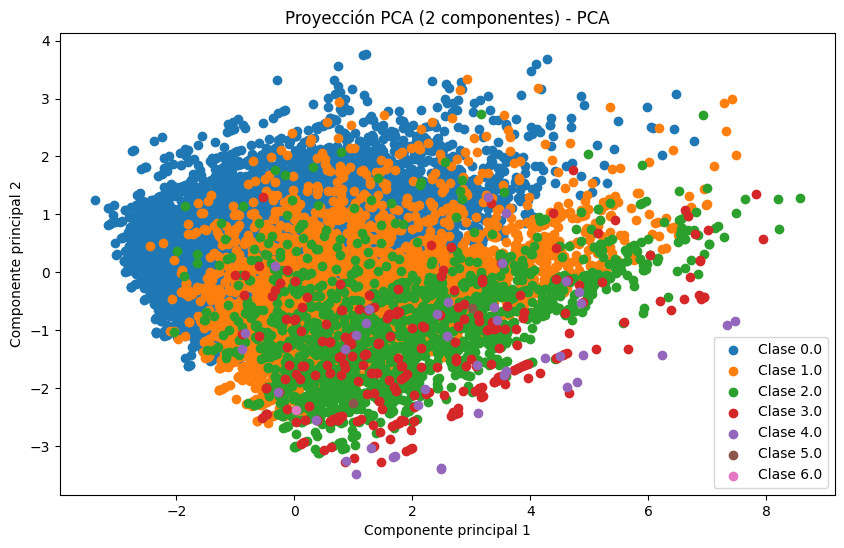

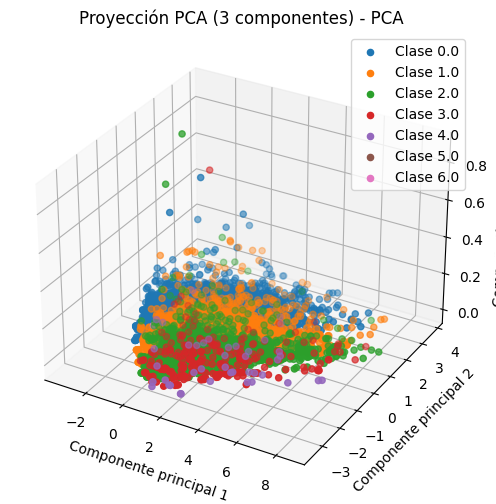

In [ ]:
# Función para graficar el PCA
def graficar_pca(pipeline, X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)

    if n_components == 2:
        plt.figure(figsize=(10, 6))
        for i, target_name in enumerate(np.unique(y)):
            plt.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], label=f'Clase {target_name}')
        plt.title(f'Proyección PCA (2 componentes) - {type(pipeline.named_steps["pca"]).__name__}')
        plt.xlabel('Componente principal 1')
        plt.ylabel('Componente principal 2')
        plt.legend()
        plt.show()
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        for i, target_name in enumerate(np.unique(y)):
            ax.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], X_pca[y == target_name, 2], label=f'Clase {target_name}')
        ax.set_title(f'Proyección PCA (3 componentes) - {type(pipeline.named_steps["pca"]).__name__}')
        ax.set_xlabel('Componente principal 1')
        ax.set_ylabel('Componente principal 2')
        ax.set_zlabel('Componente principal 3')
        ax.legend()
        plt.show()

# Crear los pipelines con los mejores modelos identificados
mejor_pipeline_2b = pipelines_2b[mejor_modelo_2b]
mejor_pipeline_3b = pipelines_3b[mejor_modelo_3b]

# Graficar PCA n=2
graficar_pca(mejor_pipeline_2b, X_train2, y_train2, n_components=2)

# Graficar PCA n=3
graficar_pca(mejor_pipeline_3b, X_train2, y_train2, n_components=3)